<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [4]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [6]:
data = pd.read_csv('./train.csv')
data.dropna()
data = data.drop(data[data['TotalSpent'] == " "].index) # удаляем мусор
#data = data.reindex(np.arange(5273))
data['TotalSpent'] = data['TotalSpent'].astype(float)
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [7]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [8]:
# YOUR CODE
print(data.isna().sum())
data.head()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

1     457
72    284
2     165
3     162
4     136
     ... 
49     45
57     39
39     35
44     34
36     34
Name: ClientPeriod, Length: 72, dtype: int64


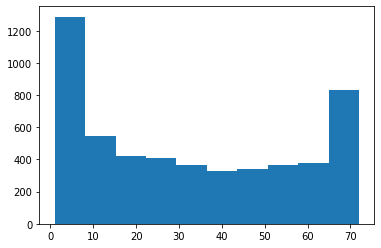

20.05    46
19.65    35
19.95    34
20.00    32
19.80    32
         ..
65.05     1
73.25     1
95.55     1
98.45     1
98.20     1
Name: MonthlySpending, Length: 1466, dtype: int64


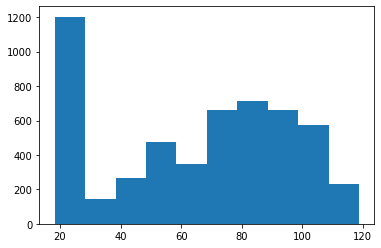

20.20      9
19.75      8
20.05      6
19.65      6
19.90      5
          ..
41.85      1
4326.25    1
950.20     1
4264.00    1
1375.60    1
Name: TotalSpent, Length: 4977, dtype: int64


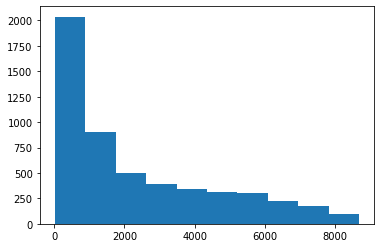

In [9]:
# YOUR CODE
for cols in num_cols:
  print(data[cols].value_counts())
  plt.hist(data[cols])
  plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

найдены ошибки в столбце 'TotalSpent', исправлены в самом начале

No     2704
Yes    2569
Name: HasPartner, dtype: int64


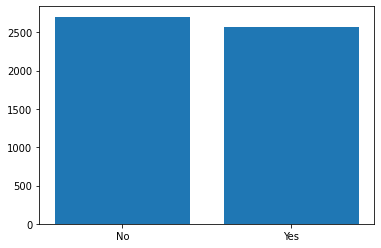

No     3676
Yes    1597
Name: HasChild, dtype: int64


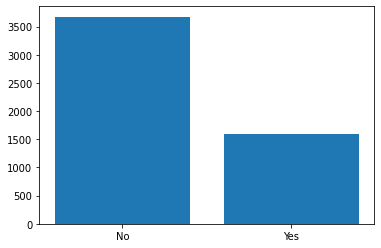

Yes    4754
No      519
Name: HasPhoneService, dtype: int64


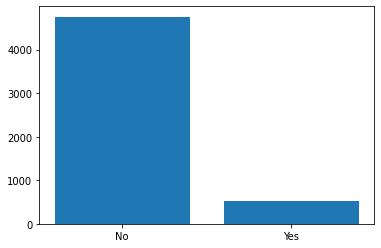

Yes    3145
No     2128
Name: IsBillingPaperless, dtype: int64


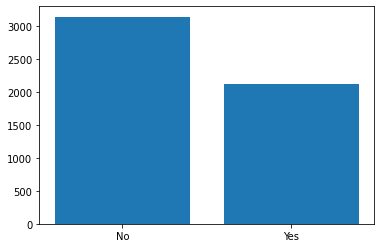

In [10]:
langs = ["No", "Yes"]
cols1 = [
    "HasPartner",
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless'
]
for col in cols1:
  print(data[col].value_counts())
  plt.bar(langs, data[col].value_counts())
  plt.show()

Fiber optic    2341
DSL            1795
No             1137
Name: HasInternetService, dtype: int64


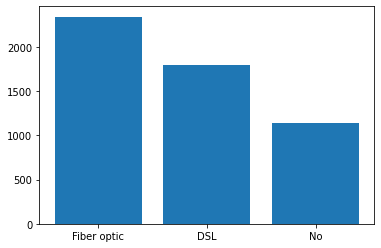

Male      2651
Female    2622
Name: Sex, dtype: int64


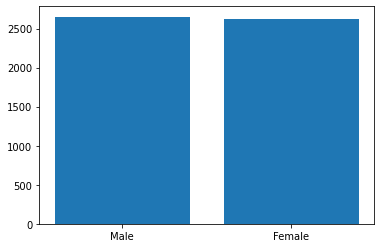

0    4431
1     842
Name: IsSeniorCitizen, dtype: int64


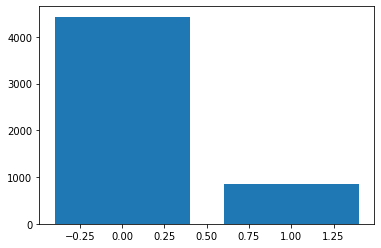

Month-to-month    2920
Two year          1272
One year          1081
Name: HasContractPhone, dtype: int64


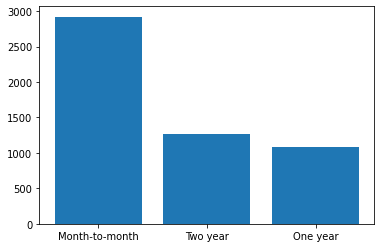

Electronic check             1786
Mailed check                 1188
Bank transfer (automatic)    1157
Credit card (automatic)      1142
Name: PaymentMethod, dtype: int64


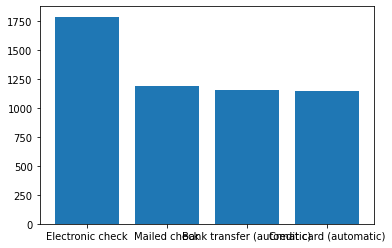

In [11]:
print(data['HasInternetService'].value_counts())
plt.bar(["Fiber optic","DSL","No"], data['HasInternetService'].value_counts())
plt.show()

print(data['Sex'].value_counts())
plt.bar(["Male", "Female"], data['Sex'].value_counts())
plt.show()

print(data['IsSeniorCitizen'].value_counts())
plt.bar([0, 1], data['IsSeniorCitizen'].value_counts())
plt.show()

print(data['HasContractPhone'].value_counts())
plt.bar(["Month-to-month", "Two year", "One year"], data['HasContractPhone'].value_counts())
plt.show()
print(data['PaymentMethod'].value_counts())
plt.bar(["Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"], data['PaymentMethod'].value_counts())
plt.show()

No                     2331
Yes                    1805
No internet service    1137
Name: HasOnlineBackup, dtype: int64


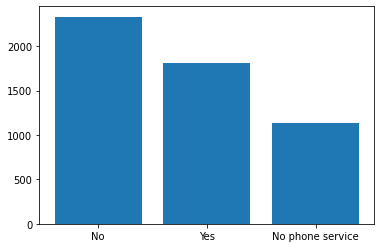

No                     2611
Yes                    1525
No internet service    1137
Name: HasOnlineSecurityService, dtype: int64


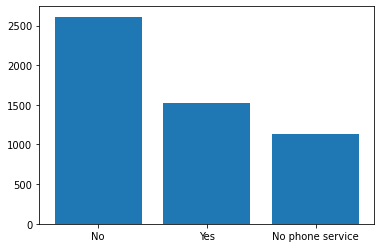

No                     2098
Yes                    2038
No internet service    1137
Name: HasOnlineTV, dtype: int64


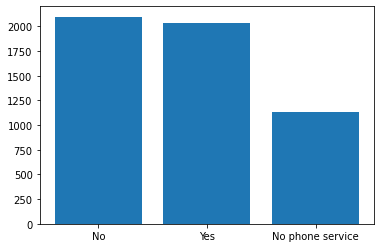

No                     2077
Yes                    2059
No internet service    1137
Name: HasMovieSubscription, dtype: int64


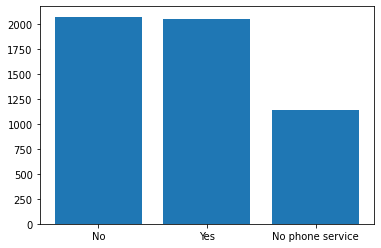

No                     2316
Yes                    1820
No internet service    1137
Name: HasDeviceProtection, dtype: int64


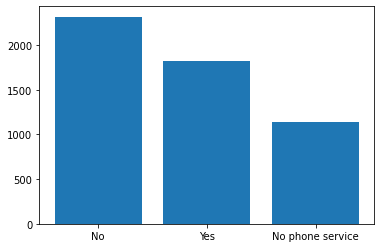

No                     2603
Yes                    1533
No internet service    1137
Name: HasTechSupportAccess, dtype: int64


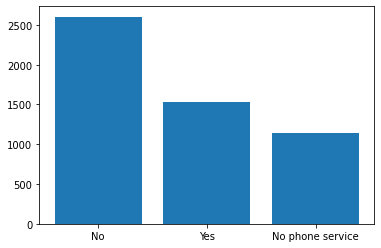

No                  2508
Yes                 2246
No phone service     519
Name: HasMultiplePhoneNumbers, dtype: int64


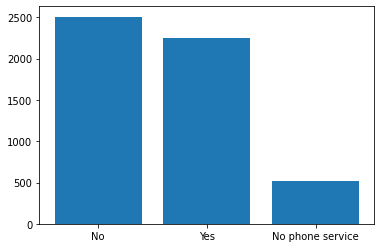

In [12]:
cols2 = {
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasMultiplePhoneNumbers'
}
for col in cols2:
  print(data[col].value_counts())
  plt.bar(["No", "Yes", "No phone service"], data[col].value_counts())
  plt.show()

0    3889
1    1384
Name: Churn, dtype: int64


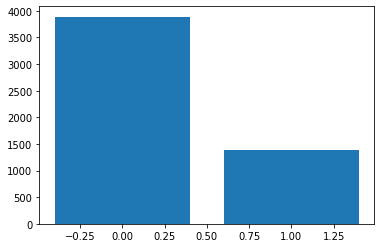

In [13]:
print(data[target_col].value_counts())
plt.bar([0, 1], data[target_col].value_counts())
plt.show()

2) Да, классы несбалансированные.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [15]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import cross_validate

In [16]:
# YOUR CODE

scaler = StandardScaler()


numeric_data = data[num_cols]
cat_data = data[cat_cols]
X_train_origin = data.iloc[:,:-1]
dummy_features = pd.get_dummies(cat_data)
data_train = pd.concat([numeric_data, dummy_features], axis=1)


X_train, X_test, y_train, y_test = train_test_split(data_train, data['Churn'], 
                                                    train_size=0.8,
                                                    random_state=42)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#lr = LogisticRegressionCV()
#lr.fit(X_train, y_train)
#roc_auc_score(lr.predict(X_test), y_test)

gbr_grid_search = GridSearchCV(LogisticRegression(), 
                               [{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                               cv=5,
                               scoring= 'roc_auc',
                               verbose=10)
gbr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START C=100.......................................................
[CV 1/5; 1/6] END ........................C=100;, score=0.835 total time=   0.0s
[CV 2/5; 1/6] START C=100.......................................................
[CV 2/5; 1/6] END ........................C=100;, score=0.817 total time=   0.0s
[CV 3/5; 1/6] START C=100.......................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 3/5; 1/6] END ........................C=100;, score=0.866 total time=   0.0s
[CV 4/5; 1/6] START C=100.......................................................
[CV 4/5; 1/6] END ........................C=100;, score=0.856 total time=   0.0s
[CV 5/5; 1/6] START C=100.......................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 5/5; 1/6] END ........................C=100;, score=0.841 total time=   0.0s
[CV 1/5; 2/6] START C=10........................................................
[CV 1/5; 2/6] END .........................C=10;, score=0.835 total time=   0.0s
[CV 2/5; 2/6] START C=10........................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 2/5; 2/6] END .........................C=10;, score=0.819 total time=   0.0s
[CV 3/5; 2/6] START C=10........................................................
[CV 3/5; 2/6] END .........................C=10;, score=0.868 total time=   0.0s
[CV 4/5; 2/6] START C=10........................................................
[CV 4/5; 2/6] END .........................C=10;, score=0.856 total time=   0.0s
[CV 5/5; 2/6] START C=10........................................................
[CV 5/5; 2/6] END .........................C=10;, score=0.837 total time=   0.0s
[CV 1/5; 3/6] START C=1.........................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 1/5; 3/6] END ..........................C=1;, score=0.835 total time=   0.0s
[CV 2/5; 3/6] START C=1.........................................................
[CV 2/5; 3/6] END ..........................C=1;, score=0.819 total time=   0.0s
[CV 3/5; 3/6] START C=1.........................................................
[CV 3/5; 3/6] END ..........................C=1;, score=0.867 total time=   0.0s
[CV 4/5; 3/6] START C=1.........................................................
[CV 4/5; 3/6] END ..........................C=1;, score=0.856 total time=   0.0s
[CV 5/5; 3/6] START C=1.........................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 5/5; 3/6] END ..........................C=1;, score=0.841 total time=   0.0s
[CV 1/5; 4/6] START C=0.1.......................................................
[CV 1/5; 4/6] END ........................C=0.1;, score=0.836 total time=   0.0s
[CV 2/5; 4/6] START C=0.1.......................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 2/5; 4/6] END ........................C=0.1;, score=0.818 total time=   0.0s
[CV 3/5; 4/6] START C=0.1.......................................................
[CV 3/5; 4/6] END ........................C=0.1;, score=0.867 total time=   0.0s
[CV 4/5; 4/6] START C=0.1.......................................................
[CV 4/5; 4/6] END ........................C=0.1;, score=0.856 total time=   0.0s
[CV 5/5; 4/6] START C=0.1.......................................................
[CV 5/5; 4/6] END ........................C=0.1;, score=0.837 total time=   0.0s
[CV 1/5; 5/6] START C=0.01......................................................
[CV 1/5; 5/6] END .......................C=0.01;, score=0.838 total time=   0.0s
[CV 2/5; 5/6] START C=0.01......................................................
[CV 2/5; 5/6] END .......................C=0.01;, score=0.816 total time=   0.0s
[CV 3/5; 5/6] START C=0.01......................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 3/5; 5/6] END .......................C=0.01;, score=0.864 total time=   0.0s
[CV 4/5; 5/6] START C=0.01......................................................
[CV 4/5; 5/6] END .......................C=0.01;, score=0.858 total time=   0.0s
[CV 5/5; 5/6] START C=0.01......................................................
[CV 5/5; 5/6] END .......................C=0.01;, score=0.832 total time=   0.0s
[CV 1/5; 6/6] START C=0.001.....................................................
[CV 1/5; 6/6] END ......................C=0.001;, score=0.828 total time=   0.0s
[CV 2/5; 6/6] START C=0.001.....................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 2/5; 6/6] END ......................C=0.001;, score=0.794 total time=   0.0s
[CV 3/5; 6/6] START C=0.001.....................................................
[CV 3/5; 6/6] END ......................C=0.001;, score=0.839 total time=   0.0s
[CV 4/5; 6/6] START C=0.001.....................................................


C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Roman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

[CV 4/5; 6/6] END ......................C=0.001;, score=0.845 total time=   0.0s
[CV 5/5; 6/6] START C=0.001.....................................................
[CV 5/5; 6/6] END ......................C=0.001;, score=0.804 total time=   0.0s


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
             scoring='roc_auc', verbose=10)

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

In [17]:
print(gbr_grid_search.best_params_)
print(gbr_grid_search.best_score_)

{'C': 1}
0.8435558285682291


## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [18]:
# YOUR CODE
#!pip install catboost
import catboost

X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data['Churn'], 
                                                    train_size=0.8,
                                                    random_state=42)
boosting_model = catboost.CatBoostClassifier(n_estimators=100, 
                                             cat_features=cat_cols)
boosting_model.fit(X_train, y_train)

y_train_predicted = boosting_model.predict_proba(X_train)[:, 1]
y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]

Learning rate set to 0.157346
0:	learn: 0.6406793	total: 183ms	remaining: 18.1s
1:	learn: 0.6000178	total: 282ms	remaining: 13.8s
2:	learn: 0.5677527	total: 331ms	remaining: 10.7s
3:	learn: 0.5422105	total: 378ms	remaining: 9.07s
4:	learn: 0.5230888	total: 428ms	remaining: 8.14s
5:	learn: 0.5071938	total: 473ms	remaining: 7.41s
6:	learn: 0.4951055	total: 522ms	remaining: 6.93s
7:	learn: 0.4814938	total: 568ms	remaining: 6.54s
8:	learn: 0.4700201	total: 616ms	remaining: 6.22s
9:	learn: 0.4607294	total: 663ms	remaining: 5.97s
10:	learn: 0.4531994	total: 713ms	remaining: 5.77s
11:	learn: 0.4461136	total: 763ms	remaining: 5.6s
12:	learn: 0.4413628	total: 782ms	remaining: 5.23s
13:	learn: 0.4366151	total: 831ms	remaining: 5.1s
14:	learn: 0.4319057	total: 882ms	remaining: 5s
15:	learn: 0.4274239	total: 935ms	remaining: 4.91s
16:	learn: 0.4239771	total: 989ms	remaining: 4.83s
17:	learn: 0.4220484	total: 1s	remaining: 4.58s
18:	learn: 0.4197172	total: 1.05s	remaining: 4.5s
19:	learn: 0.4175354

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество на тестовой выборке - 0.84441... - достигается при 100 деревьях.

In [19]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)
print(train_auc)
print(test_auc)


0.8709072905291604
0.844418494928049


# Предсказания

In [20]:
best_model = boosting_model # какая-то предыдущая модель

In [21]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.